In [1]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import camera_persp.camera as cam
import camera_persp.persp as persp
import solids.solids as solids
import transformation
from raster import *

In [2]:
def extract_polygon(edges):
    poly = []
    verts = []
    counter = 0
    for vec3d in edges:
        p1 = vec3d[0]
        verts.append(p1)
        counter += 1

        if counter == edges.sep():
            poly.append(verts)
            verts = []
            counter = 0
    return poly

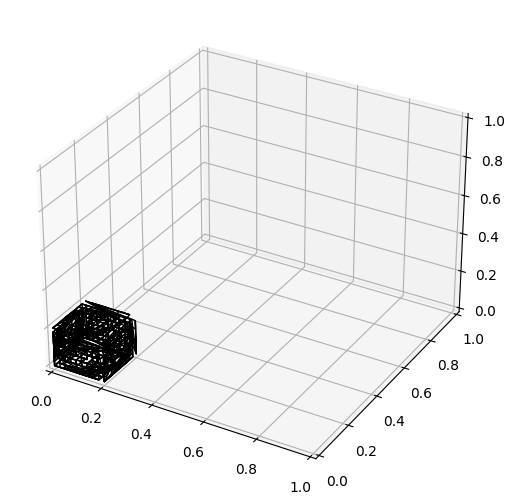

In [3]:
sol = solids.Solid()

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

edges = sol.cube2()
# edges = wireframe.cube(.5, res=.5)
edges = transformation.scale_edges(edges, (.2, .2, .2))

poly = extract_polygon(edges)

ax.add_collection3d(Poly3DCollection(poly, linewidths=1, alpha=0, edgecolors="black"))
plt.show()

In [4]:
import solids.aux as aux

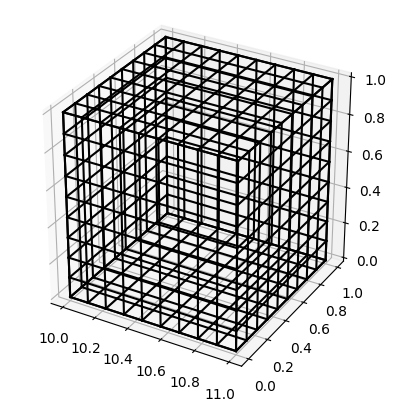

In [5]:
sol = solids.Solid()

edges = sol.cube2()
# edges = transformation.scale_edges(edges, (.2, .2, .2))
# edges = transformation.rotate_edges(edges, (10, 0, 0))
# edges = transformation.rotate_edges(edges, (45, 0, 45))
edges = transformation.translate_edges(edges, (10, 0, 0))

aux.vec2plot(edges)

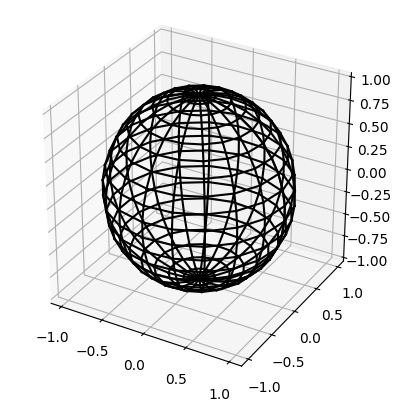

In [6]:
sol = solids.Solid()

edges = sol.sphere2()
# edges = transformation.scale_edges(edges, (.2, .2, .2))
# edges = transformation.rotate_edges(edges, (10, 0, 0))
edges = transformation.rotate_edges(edges, (0, 0, 0))
# edges = transformation.translate_edges(edges, (10, 0, 0))

aux.vec2plot(edges)

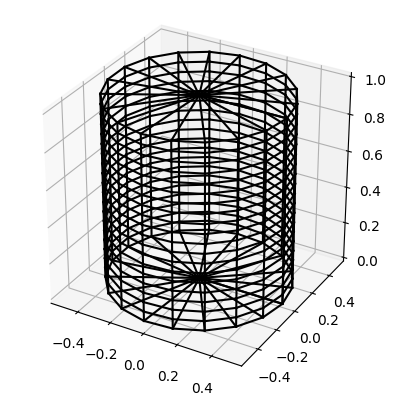

In [7]:
sol = solids.Solid()

edges = sol.cylinder2()
# edges = transformation.scale_edges(edges, (.2, .2, .2))
# edges = transformation.rotate_edges(edges, (10, 0, 0))
# edges = transformation.rotate_edges(edges, (45, 0, 0))
# edges = transformation.translate_edges(edges, (10, 0, 0))

aux.vec2plot(edges)

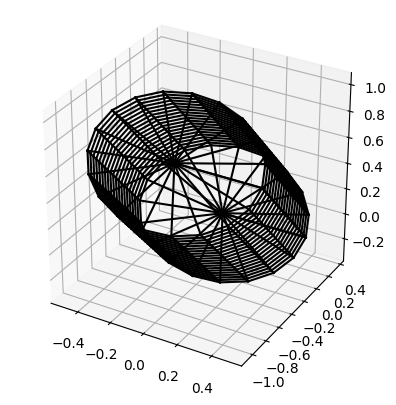

In [8]:
sol = solids.Solid()

edges = sol.cylinder2()
# edges = transformation.scale_edges(edges, (.2, .2, .2))
# edges = transformation.rotate_edges(edges, (10, 0, 0))
edges = transformation.rotate_edges(edges, (45, 0, 0))
# edges = transformation.translate_edges(edges, (10, 0, 0))

aux.vec2plot(edges)

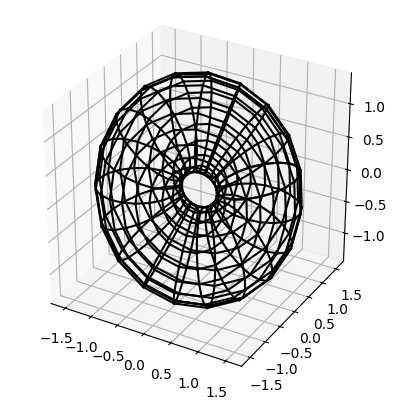

In [9]:
sol = solids.Solid()

edges = sol.toroide2()
# edges = transformation.scale_edges(edges, (.2, .2, .2))
# edges = transformation.rotate_edges(edges, (10, 0, 0))
edges = transformation.rotate_edges(edges, (45, 0, 45))
# edges = transformation.translate_edges(edges, (10, 0, 0))

aux.vec2plot(edges)

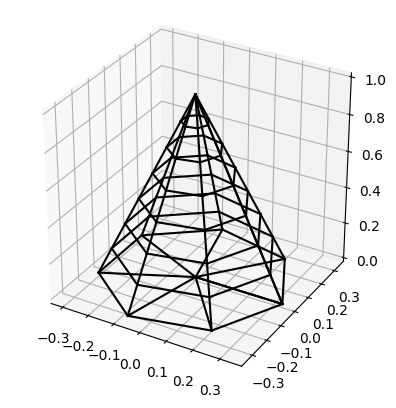

In [13]:
sol = solids.Solid()

edges = sol.cone2(t=8)
# edges = transformation.scale_edges(edges, (.2, .2, .2))
# edges = transformation.rotate_edges(edges, (10, 0, 0))
edges = transformation.rotate_edges(edges, (0, 0, 0))
# edges = transformation.translate_edges(edges, (10, 0, 0))

aux.vec2plot(edges)

((0.0, 1.0, 0.0), (-0.7071067811865475, 0.0, 0.7071067811865475), (-0.7071067811865475, 0.0, -0.7071067811865475))


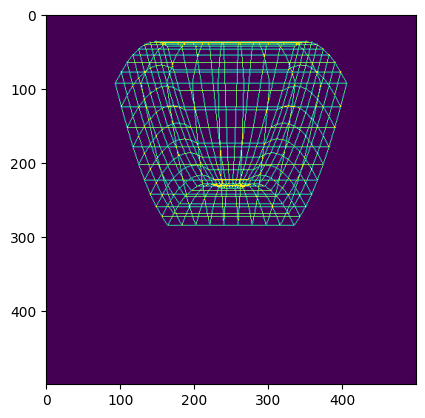

In [11]:
# Setup Camera
at = (0, 0, 0)
eye = (5, 0, 5)

# eye = transformation.rotate(eye, (45, 0, 0))
camera = cam.get_camera(at, eye)
print(camera)

sol = solids.Solid()
# edges = sol.sphere2()
# 
# edges = transformation.scale_interval(edges, (0, 20))  # Camera is between 0 and 20
# edges = cam.edges_to_camera(edges, camera, eye)
# edges = transformation.scale_interval(edges, (-1, 1), (0, 20))  # The raster representation is between -1 and 1
# 
# # Trans
# edges = transformation.rotate_edges(edges, (0, 0, 0))
# edges = transformation.translate_edges(edges, (1, 1, 1))
# # edges = transformation.translate_edges(edges, (2, 1, 1))
# # edges = transformation.scale_edges(edges, (1, 1, 1))

# 2
edges2 = sol.cube2()
# edges2 = wireframe.cube(.5, res=.3)

edges2 = transformation.scale_interval(edges2, (0, 20))  # Camera is between 0 and 20
edges2 = cam.edges_to_camera(edges2, camera, eye)
edges2 = transformation.scale_interval(edges2, (-1, 1), (0, 20))  # The raster representation is between -1 and 1

scale_x, scale_y = (500, 500)
scale = (scale_x, scale_y)

# new_edges = persp.perspective_edges(edges, eye, scale)
new_edges2 = persp.perspective_edges(edges2, eye, scale)

mx = [[0 for _ in range(scale_x)] for _ in range(scale_y)]
# pts = draw_edge_list(new_edges, scale)
pts2 = draw_edge_list(new_edges2, scale)
# insert_points(mx, pts)
insert_points(mx, pts2)

plt.imshow(convert_img(mx))
plt.show()